<a href="https://colab.research.google.com/github/PanosRntgs/Machine-Learning/blob/main/Iris_Species_Classification_SVM_vs_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Python notebook is about how to use machine learning algorithms, specifically Support Vector Machines (SVM) and Logistic Regression, for classification tasks using the Iris dataset.**

The steps involved are as follows:

**Data Loading and Preparation:**

Loads the Iris dataset and retains only the sepal length and sepal width features. It also keeps samples belonging to Iris-Setosa and Iris-Virginica classes.

**Data Visualization:**

Plots the sepal length against the sepal width to visualize the distribution of Iris-Setosa and Iris-Virginica samples.

**SVM Classification:**

Trains two Support Vector Machine (SVM) classifiers with different regularization strengths (C values). It prints the accuracy of each model and comments on the results.

**Logistic Regression Classification:**

Trains a Logistic Regression model with a specified regularization strength (C=10) and evaluates its accuracy.

**Contour Plot Visualization:**

Generates a contour plot showing the probability of a sample being classified as Iris-Virginica across different combinations of sepal lengths and widths. It also overlays the original data points.

**Probability Prediction:**

Predicts the probability of a sample being Iris-Setosa given specific sepal length and width values (5.5 cm and 3.25 cm) using the trained Logistic Regression model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#Load the data
iris = datasets.load_iris()
X = iris.data[:, :2]  #It Keeps only sepal length and sepal width features
y = (iris.target == 0) | (iris.target == 2)  # It Keeps only Iris-Setosa and Iris-Virginica samples

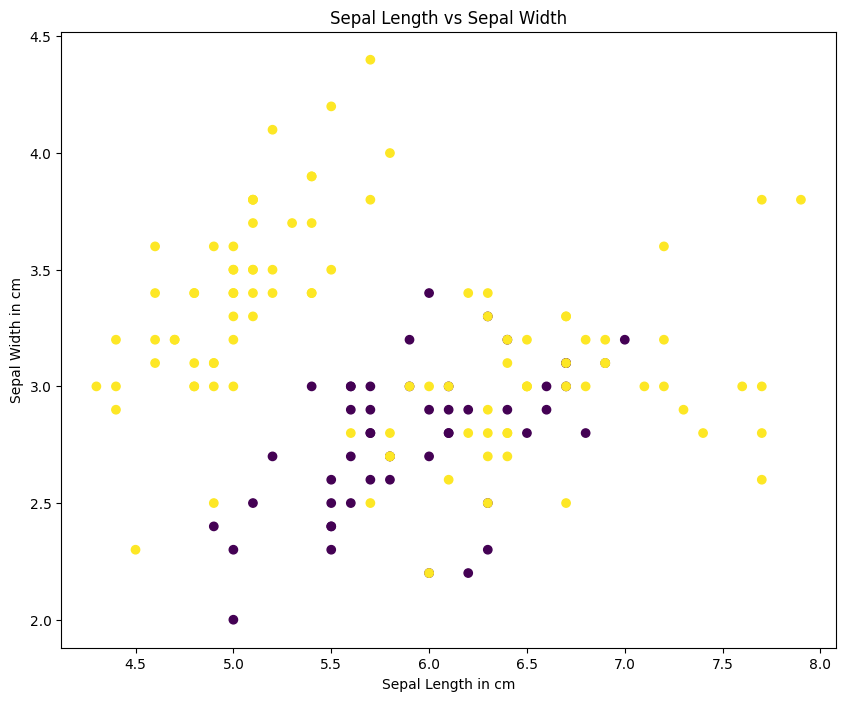

In [3]:
#Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis' )
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [4]:
#Train two linear SVM classifiers with the given values
C_values = [10, 100]

for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X, y)
    #Print accuracy and comment on the results
    y_pred = svm_model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"SVM (C={C}) Accuracy: {accuracy}")

SVM (C=10) Accuracy: 0.74
SVM (C=100) Accuracy: 0.7333333333333333


In [5]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(C=10)
logistic_model.fit(X, y)

# Predict and evaluate accuracy
y_pred_logistic = logistic_model.predict(X)
accuracy_logistic_regration = accuracy_score(y, y_pred_logistic)

print(f"Logistic Regression with C=10) Accuracy: {accuracy_logistic_regration}")

Logistic Regression with C=10) Accuracy: 0.7133333333333334


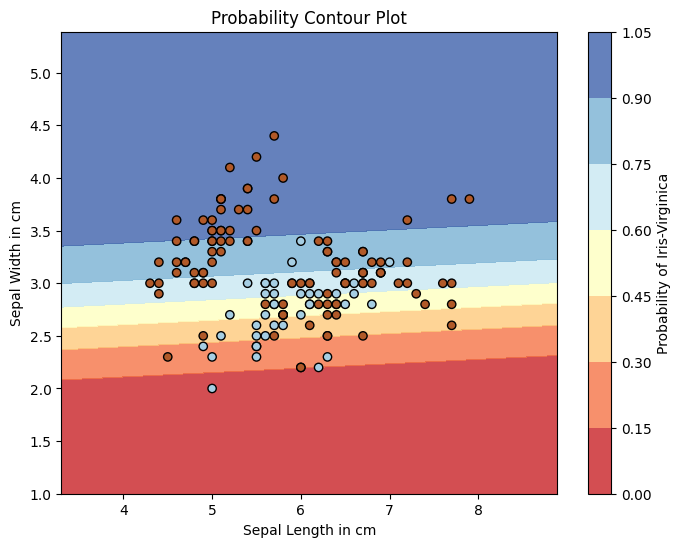

In [6]:
# Generate a grid of sepal lengths and sepal widths
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict probabilities for each point in the grid
probas = logistic_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
probas = probas.reshape(xx.shape)

# Plot the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(xx, yy, probas, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.colorbar(contour, label='Probability of Iris-Virginica')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.title('Probability Contour Plot')
plt.show()

In [7]:
#Predict probability for given sample
sample = np.array([[5.5, 3.25]])
probability_iris_setosa = logistic_model.predict_proba(sample)[:, 1]
print("Probability of Iris Setosa:", {probability_iris_setosa[0]})

Probability of Iris Setosa: {0.8314320055044366}
